# Convolutional Autoencoders

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

## Carregando a base de dados MNIST

In [ ]:
(prev_train, _), (prev_test, _) = mnist.load_data()

## Aplicando reshape nas imagens, nessesário para trabalhar com CNN

In [ ]:
prev_train = prev_train.reshape(len(prev_train), 28, 28, 1)
prev_test= prev_test.reshape(len(prev_test), 28, 28, 1)

## Aplicando a normalização 

In [ ]:
prev_train = prev_train.astype("float32") / 255
prev_test = prev_test.astype("float32") / 255

In [ ]:
print(prev_train.shape, prev_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Criando o Convolutianal Autoencoder

In [ ]:
autoencoder = Sequential()

## Criando o Encoder de Decode

In [ ]:
# Encder
autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3),
                       activation = "relu", input_shape = (28, 28, 1)))
autoencoder.add(MaxPooling2D(pool_size = (2, 2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = "relu", padding = "same"))
autoencoder.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))

# matriz 4 x 4 x 8
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = "relu", padding = "same", strides = (2, 2)))

autoencoder.add(Flatten())

autoencoder.add(Reshape((4, 4, 8)))

# Decoder
autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = "relu", padding = "same"))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = "relu"))
autoencoder.add(UpSampling2D(size = (2, 2)))

autoencoder.add(Conv2D(filters = 1, kernel_size = (3, 3), activation = "sigmoid", padding = "same"))

In [ ]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)          

## Compilando o modelo

In [ ]:
autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy",
                    metrics = ["accuracy"])

## Treinamento do modelo

In [ ]:
autoencoder.fit(prev_train, prev_train,
                epochs = 100, batch_size = 256,
                validation_data = (prev_test, prev_test))

## Criando o Encoder

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer("flatten_1").output)

In [ ]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0   

## Codificando imagens

In [ ]:
img_code = encoder.predict(prev_test) 

In [ ]:
img_decoder = autoencoder.predict(prev_test)

## Visualizando Resultados

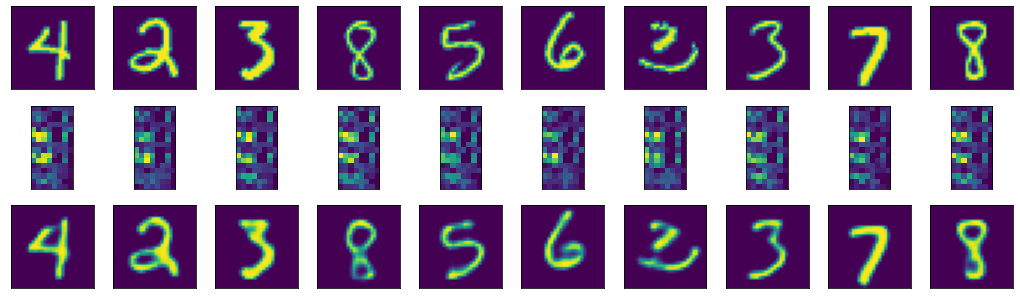

In [ ]:
num_imagens = 10

# Selecionando 10 imagens aleatórias da base de dados de teste
imagens_test = np.random.randint(prev_test.shape[0], size = num_imagens)

# Plotando as imagens
plt.figure(figsize = (18, 18))

for i, indice_img in enumerate(imagens_test):
    
    # Gráfico 01, plotar a imagem Original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(prev_test[indice_img].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
     # Gráfico 02, plotar a imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens)
    plt.imshow(img_code[indice_img].reshape(16, 8))
    plt.xticks(())
    plt.yticks(())
    
    # Gráfico 03, plotar a imagem Decodificada
    eixo = plt.subplot(10, 10, i + 1 + num_imagens * 2)
    plt.imshow(img_decoder[indice_img].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())